Trying the Prana Exercise with our Dataset

In [1]:
%config IPCompleter.greedy=True
from sklearn import datasets
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import csv

In [2]:
mySet = pd.read_csv('../data/sliding01.csv', index_col=0)

In [3]:
df = mySet

In [4]:
df.head(10)

result  odds-home  odds-draw  odds-away  home-wins  home-draws  home-losses  \
0      H       1.36       4.50       9.00          5           3            2   
1      D       2.25       3.00       3.50          3           4            3   
2      D       2.80       3.00       2.70          5           2            3   
3      A       1.91       3.25       4.33          5           3            2   
4      H       2.10       3.00       4.00          2           4            4   
5      D       3.60       3.00       2.20          3           1            6   
6      A       1.75       3.25       5.50          5           2            3   
7      A       1.73       3.25       5.50          3           1            6   
8      A       5.25       3.30       1.75          0           6            4   
9      D       2.75       3.00       2.75          2           1            7   

   home-goals  home-opposition-goals  away-wins  away-draws  away-losses  \
0          14                     10          2           2            6   
1          16                     12          4           3            3   
2          10                      8          4           4            2   
3          18                     11          3           3            4   
4           6                      9          1           6            3   
5           7                     16          5           4            1   
6          12                      9          5           3            2   
7           6                     10          2           3            5   
8          10                     14          6           3            1   
9           8                     16          3           6            1   

   away-goals  away-opposition-goals  
0           8                     14  
1          14                     12  
2          15                     13  
3          10                     11  
4           7                     10  
5          20                     13  
6           9                      8  
7          10                     14  
8          14                      8  
9          13                      9

In [5]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0       2       1.36       4.50       9.00          5           3   
1       1       2.25       3.00       3.50          3           4   
2       1       2.80       3.00       2.70          5           2   
3       0       1.91       3.25       4.33          5           3   
4       2       2.10       3.00       4.00          2           4   

   home-losses  home-goals  home-opposition-goals  away-wins  away-draws  \
0            2          14                     10          2           2   
1            3          16                     12          4           3   
2            3          10                      8          4           4   
3            2          18                     11          3           3   
4            4           6                      9          1           6   

   away-losses  away-goals  away-opposition-goals  
0            6           8                     14  
1            3          14                     12  
2            2          15                     13  
3            4          10                     11  
4            3           7                     10

In [6]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0,shuffle=False)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5295341764046743


In [10]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

D:\ProgrammeFile\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


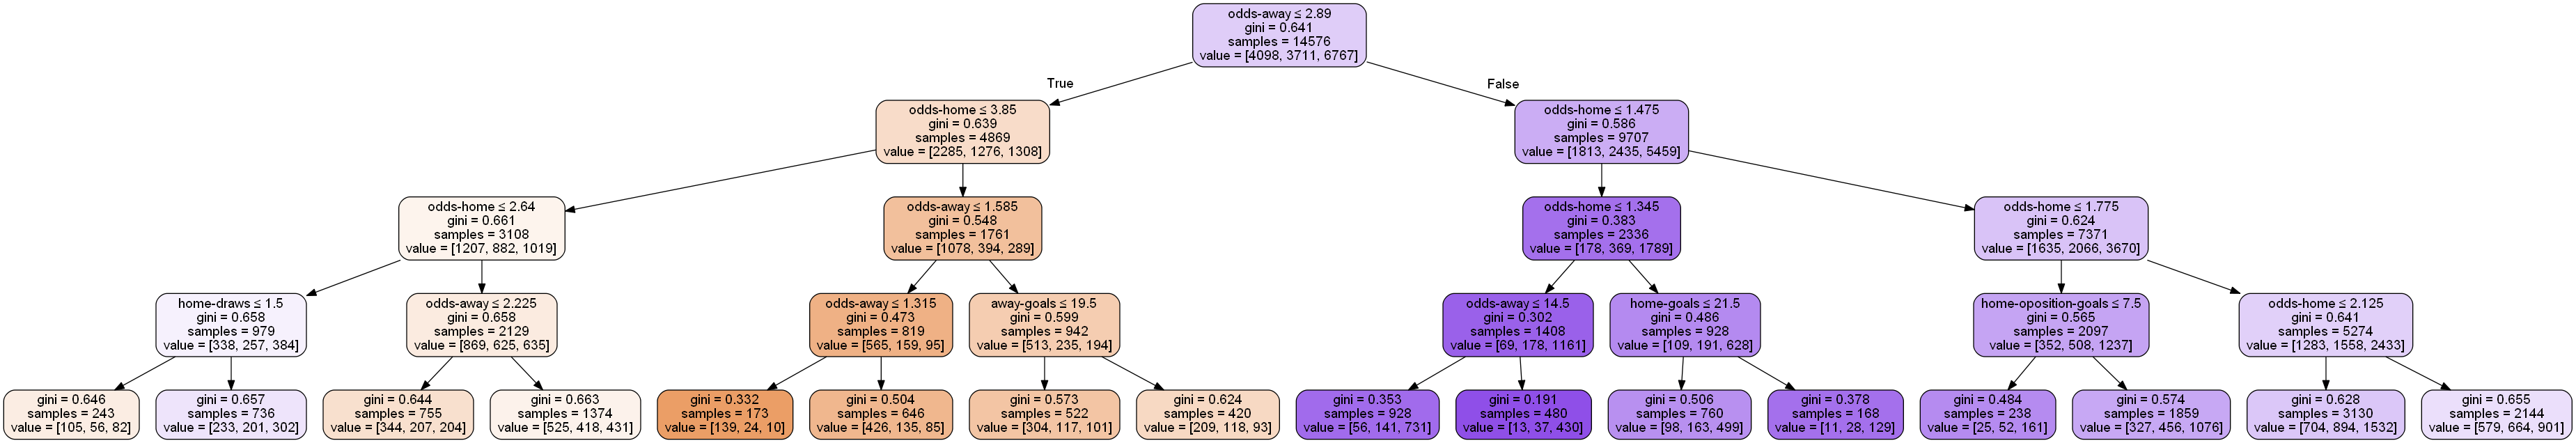

In [12]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("./tree.pdf")

Image(graph.create_png())

In [13]:
mySet = pd.read_csv('../data/sliding02_shots.csv', index_col=0)

In [14]:
df = mySet

In [15]:
df.head(10)

result  odds-home  odds-draw  odds-away  home-wins  home-draws  home-losses  \
0      H       3.50       3.30       2.10          1           3            6   
1      D       2.50       3.30       2.88          3           1            6   
2      A       1.91       3.40       4.20          4           2            4   
3      H       3.25       3.25       2.30          5           2            3   
4      H       1.20       6.00      19.00          7           2            1   
5      A       2.38       3.30       3.00          3           3            4   
6      A       2.60       3.25       2.80          4           1            5   
7      A       2.25       3.25       3.40          5           2            3   
8      D       1.80       3.40       5.00          3           2            5   
9      A       1.70       3.80       5.00          6           2            2   

   home-goals  home-opposition-goals  home-shots  ...  \
0          11                     16         137  ...   
1           8                     16         134  ...   
2          10                     15         120  ...   
3          22                     12         177  ...   
4          15                      8         161  ...   
5           9                     11         102  ...   
6          15                     16         125  ...   
7          15                     17          89  ...   
8          12                     14         126  ...   
9          17                     11          95  ...   

   home-opposition_shots_on_target  away-wins  away-draws  away-losses  \
0                               53          8           2            0   
1                               77          3           3            4   
2                               56          2           2            6   
3                               37          6           3            1   
4                               31          3           2            5   
5                               77          4           2            4   
6                               73          4           3            3   
7                               73          2           2            6   
8                               49          3           1            6   
9                               73          3           2            5   

   away-goals  away-opposition-goals  away-shots  away-shots_on_target  \
0          15                      6         161                    78   
1          11                     18         104                    44   
2          11                     15         134                    59   
3          19                      8         169                    95   
4          10                     17         143                    69   
5          11                     13         126                    59   
6          13                     16         103                    51   
7           7                     12         128                    64   
8          10                     17          75                    34   
9           9                     15         105                    51   

   away-opposition_shots  away-opposition_shots_on_target  
0                     72                               30  
1                     87                               36  
2                    100                               46  
3                    113                               58  
4                    134                               69  
5                    122                               59  
6                    138                               76  
7                    148                               74  
8                    144                               70  
9                    160                               79  

[10 rows x 22 columns]

In [16]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0       2       3.50       3.30       2.10          1           3   
1       1       2.50       3.30       2.88          3           1   
2       0       1.91       3.40       4.20          4           2   
3       2       3.25       3.25       2.30          5           2   
4       2       1.20       6.00      19.00          7           2   

   home-losses  home-goals  home-opposition-goals  home-shots  ...  \
0            6          11                     16         137  ...   
1            6           8                     16         134  ...   
2            4          10                     15         120  ...   
3            3          22                     12         177  ...   
4            1          15                      8         161  ...   

   home-opposition_shots_on_target  away-wins  away-draws  away-losses  \
0                               53          8           2            0   
1                               77          3           3            4   
2                               56          2           2            6   
3                               37          6           3            1   
4                               31          3           2            5   

   away-goals  away-opposition-goals  away-shots  away-shots_on_target  \
0          15                      6         161                    78   
1          11                     18         104                    44   
2          11                     15         134                    59   
3          19                      8         169                    95   
4          10                     17         143                    69   

   away-opposition_shots  away-opposition_shots_on_target  
0                     72                               30  
1                     87                               36  
2                    100                               46  
3                    113                               58  
4                    134                               69  

[5 rows x 22 columns]

In [17]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0,shuffle=False)

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=7, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5123222748815166


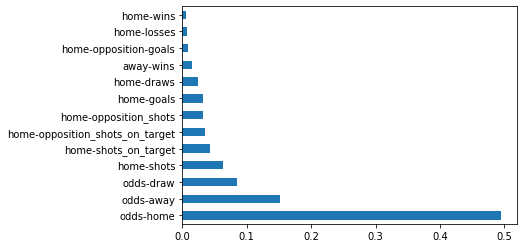

In [21]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [22]:

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

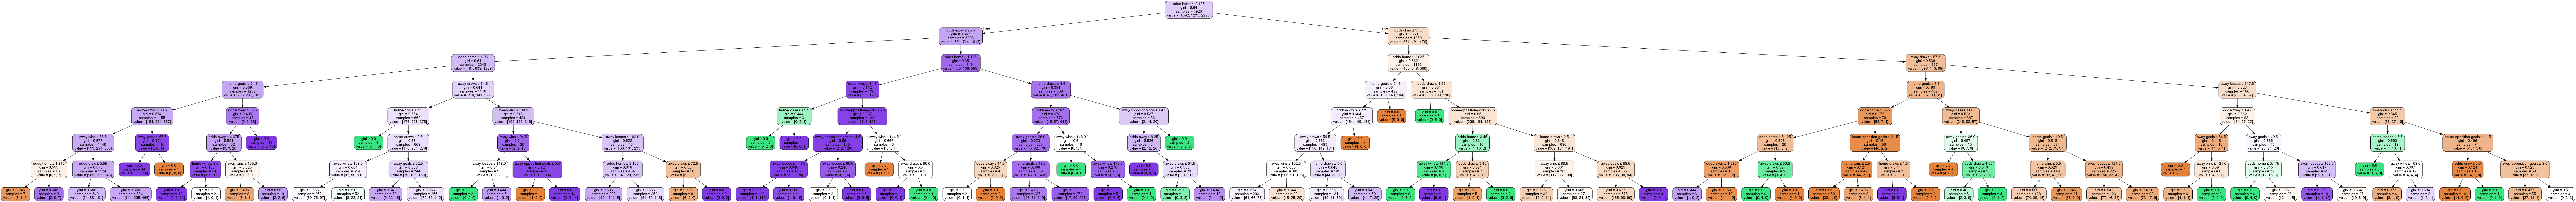

In [23]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("./tree.pdf")

Image(graph.create_png())

In [24]:
mySet = pd.read_csv('../data/sliding03_shots_extra.csv', index_col=0)

In [25]:
df = mySet

In [26]:
df.head(10)

result  odds-home  odds-draw  odds-away  home-wins  home-draws  home-losses  \
0      H       3.50       3.30       2.10          1           3            6   
1      D       2.50       3.30       2.88          3           1            6   
2      A       1.91       3.40       4.20          4           2            4   
3      H       3.25       3.25       2.30          5           2            3   
4      H       1.20       6.00      19.00          7           2            1   
5      A       2.38       3.30       3.00          3           3            4   
6      A       2.60       3.25       2.80          4           1            5   
7      A       2.25       3.25       3.40          5           2            3   
8      D       1.80       3.40       5.00          3           2            5   
9      A       1.70       3.80       5.00          6           2            2   

   home-goals  home-opposition-goals  home-shots  ...  away-opposition_shots  \
0          11                     16         137  ...                     72   
1           8                     16         134  ...                     87   
2          10                     15         120  ...                    100   
3          22                     12         177  ...                    113   
4          15                      8         161  ...                    134   
5           9                     11         102  ...                    122   
6          15                     16         125  ...                    138   
7          15                     17          89  ...                    148   
8          12                     14         126  ...                    144   
9          17                     11          95  ...                    160   

   away-opposition_shots_on_target  home_shot_accuracy  home_shot_efficiency  \
0                               30            0.489051              0.164179   
1                               36            0.477612              0.125000   
2                               46            0.483333              0.172414   
3                               58            0.463277              0.268293   
4                               69            0.447205              0.208333   
5                               59            0.460784              0.191489   
6                               76            0.504000              0.238095   
7                               74            0.415730              0.405405   
8                               70            0.484127              0.196721   
9                               79            0.442105              0.404762   

   home_opposition_shot_accuracy  home_opposition_shot_efficiency  \
0                       0.452991                         0.301887   
1                       0.509934                         0.207792   
2                       0.451613                         0.267857   
3                       0.500000                         0.324324   
4                       0.418919                         0.258065   
5                       0.578947                         0.142857   
6                       0.477124                         0.219178   
7                       0.421965                         0.232877   
8                       0.462264                         0.285714   
9                       0.510490                         0.150685   

   away_shot_accuracy  away_shot_efficiency  away_opposition_shot_accuracy  \
0            0.484472              0.192308                       0.416667   
1            0.423077              0.250000                       0.413793   
2            0.440299              0.186441                       0.460000   
3            0.562130              0.200000                       0.513274   
4            0.482517              0.144928                       0.514925   
5            0.468254              0.186441                       0.483607   
6            0.495146              0.25490

In [27]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0       2       3.50       3.30       2.10          1           3   
1       1       2.50       3.30       2.88          3           1   
2       0       1.91       3.40       4.20          4           2   
3       2       3.25       3.25       2.30          5           2   
4       2       1.20       6.00      19.00          7           2   

   home-losses  home-goals  home-opposition-goals  home-shots  ...  \
0            6          11                     16         137  ...   
1            6           8                     16         134  ...   
2            4          10                     15         120  ...   
3            3          22                     12         177  ...   
4            1          15                      8         161  ...   

   away-opposition_shots  away-opposition_shots_on_target  home_shot_accuracy  \
0                     72                               30            0.489051   
1                     87                               36            0.477612   
2                    100                               46            0.483333   
3                    113                               58            0.463277   
4                    134                               69            0.447205   

   home_shot_efficiency  home_opposition_shot_accuracy  \
0              0.164179                       0.452991   
1              0.125000                       0.509934   
2              0.172414                       0.451613   
3              0.268293                       0.500000   
4              0.208333                       0.418919   

   home_opposition_shot_efficiency  away_shot_accuracy  away_shot_efficiency  \
0                         0.301887            0.484472              0.192308   
1                         0.207792            0.423077              0.250000   
2                         0.267857            0.440299              0.186441   
3                         0.324324            0.562130              0.200000   
4                         0.258065            0.482517              0.144928   

   away_opposition_shot_accuracy  away_opposition_shot_efficiency  
0                       0.416667                         0.200000  
1                       0.413793                         0.500000  
2                       0.460000                         0.326087  
3                       0.513274                         0.137931  
4                       0.514925                         0.246377  

[5 rows x 30 columns]

In [28]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0,shuffle=False)

In [30]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5208530805687204


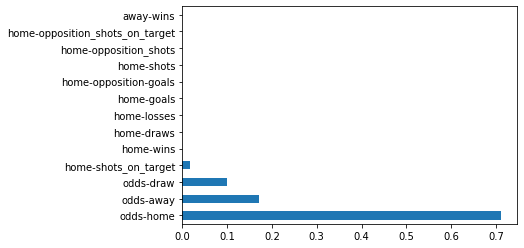

In [32]:

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

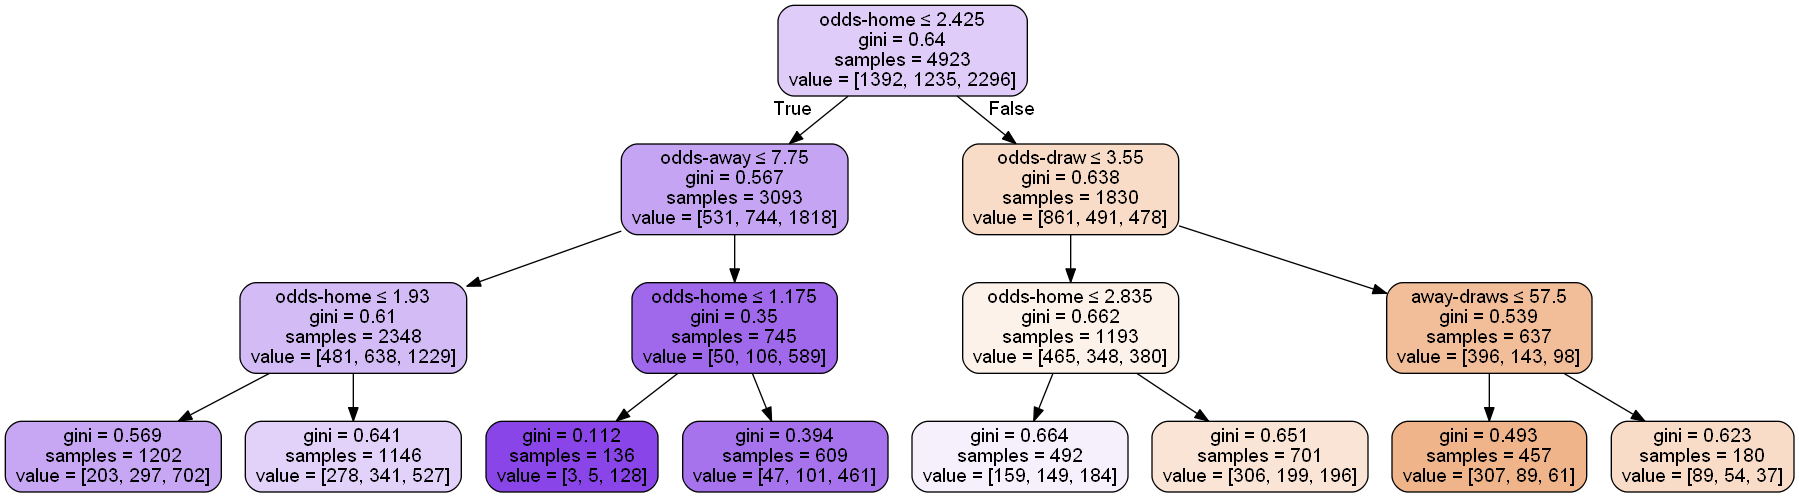

In [34]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("./tree.pdf")

Image(graph.create_png())

In [35]:
mySet = pd.read_csv('../data/sliding04_shots_and_possession.csv', index_col=0)

In [36]:
df = mySet

In [37]:
df.head(10)

result  odds-home  odds-draw  odds-away  home-wins  home-draws  home-losses  \
0      H       3.50       3.30        2.1          1           3            6   
1      H       3.25       3.25        2.3          5           2            3   
2      H       1.20       6.00       19.0          7           2            1   
3      A       2.38       3.30        3.0          3           3            4   
4      A       2.60       3.25        2.8          4           1            5   
5      A       2.25       3.25        3.4          6           2            2   
6      D       1.80       3.40        5.0          3           2            5   
7      A       2.25       3.30        3.3          3           1            6   
8      H       2.38       3.25        3.1          3           2            5   
9      A       1.50       4.00        7.0          5           2            3   

   home-goals  home-opposition-goals  home-shots  ...  away-draws  \
0          11                     16         137  ...           2   
1          19                     12         189  ...           3   
2          15                      8         161  ...           2   
3           9                     11         102  ...           2   
4          15                     16         125  ...           3   
5          17                     15          88  ...           2   
6          12                     14         126  ...           1   
7          20                     18         125  ...           3   
8           8                      9         125  ...           2   
9          20                     13         176  ...           2   

   away-losses  away-goals  away-opposition-goals  away-shots  \
0            0          15                      6         161   
1            1          19                      8         169   
2            6           9                     18         132   
3            5           9                     16         116   
4            3          13                     16         103   
5            6           7                     12         128   
6            6          10                     17          75   
7            5          12                     15         139   
8            5          13                     17          90   
9            3          14                     11         101   

   away-shots_on_target  away-possession  away-opposition_shots  \
0                    78              482                     72   
1                    95              548                    113   
2                    62              424                    139   
3                    54              410                    131   
4                    51              437                    138   
5                    64              413                    148   
6                    34              428                    144   
7                    70              482                    121   
8                    46              429                    126   
9                    47              476                    141   

   away-opposition_shots_on_target  away-opposition_possession  
0                               30                         428  
1                               58                         362  
2                               71                         486  
3                               64                         500  
4                               76                         473  
5                               74                         496  
6                               70                         482  
7                               51                         428  
8                               50                         481  
9                               69                         434  

[10 rows x 26 columns]

In [38]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0       2       3.50       3.30        2.1          1           3   
1       2       3.25       3.25        2.3          5           2   
2       2       1.20       6.00       19.0          7           2   
3       0       2.38       3.30        3.0          3           3   
4       0       2.60       3.25        2.8          4           1   

   home-losses  home-goals  home-opposition-goals  home-shots  ...  \
0            6          11                     16         137  ...   
1            3          19                     12         189  ...   
2            1          15                      8         161  ...   
3            4           9                     11         102  ...   
4            5          15                     16         125  ...   

   away-draws  away-losses  away-goals  away-opposition-goals  away-shots  \
0           2            0          15                      6         161   
1           3            1          19                      8         169   
2           2            6           9                     18         132   
3           2            5           9                     16         116   
4           3            3          13                     16         103   

   away-shots_on_target  away-possession  away-opposition_shots  \
0                    78              482                     72   
1                    95              548                    113   
2                    62              424                    139   
3                    54              410                    131   
4                    51              437                    138   

   away-opposition_shots_on_target  away-opposition_possession  
0                               30                         428  
1                               58                         362  
2                               71                         486  
3                               64                         500  
4                               76                         473  

[5 rows x 26 columns]

In [39]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [40]:

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0,shuffle=False)

In [41]:

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5202477370176274


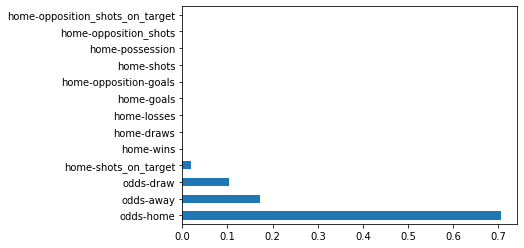

In [43]:

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

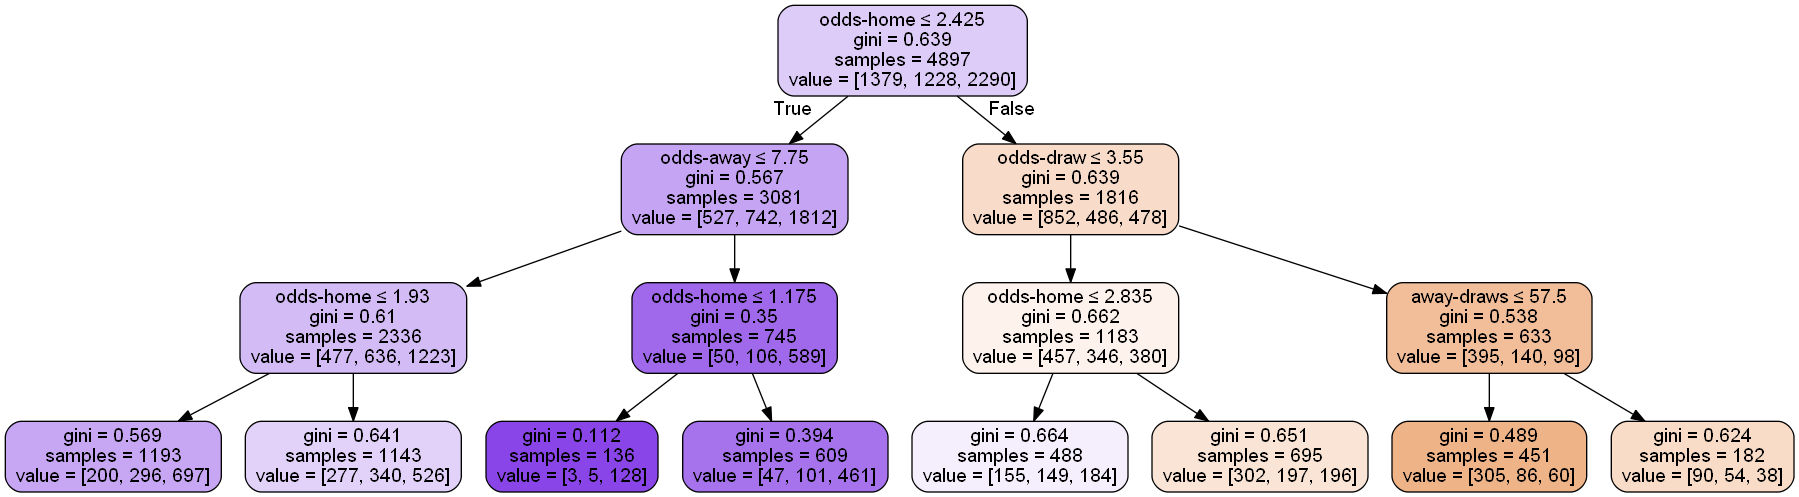

In [45]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("./tree.pdf")

Image(graph.create_png())

In [46]:
mySet = pd.read_csv('../data/sliding05_shots_and_possession_extra.csv', index_col=0)

In [47]:
df = mySet

In [48]:
df.head(10)

result  odds-home  odds-draw  odds-away  home-wins  home-draws  home-losses  \
0      H       3.50       3.30        2.1          1           3            6   
1      H       3.25       3.25        2.3          5           2            3   
2      H       1.20       6.00       19.0          7           2            1   
3      A       2.38       3.30        3.0          3           3            4   
4      A       2.60       3.25        2.8          4           1            5   
5      A       2.25       3.25        3.4          6           2            2   
6      D       1.80       3.40        5.0          3           2            5   
7      A       2.25       3.30        3.3          3           1            6   
8      H       2.38       3.25        3.1          3           2            5   
9      A       1.50       4.00        7.0          5           2            3   

   home-goals  home-opposition-goals  home-shots  ...  \
0          11                     16         137  ...   
1          19                     12         189  ...   
2          15                      8         161  ...   
3           9                     11         102  ...   
4          15                     16         125  ...   
5          17                     15          88  ...   
6          12                     14         126  ...   
7          20                     18         125  ...   
8           8                      9         125  ...   
9          20                     13         176  ...   

   away-opposition_shots_on_target  away-opposition_possession  \
0                               30                         428   
1                               58                         362   
2                               71                         486   
3                               64                         500   
4                               76                         473   
5                               74                         496   
6                               70                         482   
7                               51                         428   
8                               50                         481   
9                               69                         434   

   home_shot_accuracy  home_shot_efficiency  home_opposition_shot_accuracy  \
0            0.489051              0.164179                       0.452991   
1            0.470899              0.213483                       0.521739   
2            0.447205              0.208333                       0.418919   
3            0.460784              0.191489                       0.578947   
4            0.504000              0.238095                       0.477124   
5            0.431818              0.447368                       0.456790   
6            0.484127              0.196721                       0.462264   
7            0.552000              0.289855                       0.460784   
8            0.456000              0.140351                       0.480620   
9            0.471591              0.240964                       0.518072   

   home_opposition_shot_efficiency  away_shot_accuracy  away_shot_efficiency  \
0                         0.301887            0.484472              0.192308   
1                         0.333333            0.562130              0.200000   
2                         0.258065            0.469697              0.145161   
3                         0.142857            0.465517              0.166667   
4                         0.219178            0.495146              0.254902   
5                         0.202703            0.500000              0.109375   
6                         0.285714            0.453333              0.294118   
7                         0.382979            0.503597              0.171429   
8                         0.145161            0.511111              0.282609   
9                         0.302326            0.465347              0.297872   

   away_opposit

In [49]:
le = preprocessing.LabelEncoder()
le.fit([ "A", "D", "H"])
df.loc[:,['result']]=le.transform(df['result'])
feature_cols=['odds-home','odds-draw','odds-away','home-wins','home-draws','home-losses','home-goals','home-oposition-goals','away-wins','away-draws','away-losses','away-goals','away-opposition-goals']
df.head()

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0       2       3.50       3.30        2.1          1           3   
1       2       3.25       3.25        2.3          5           2   
2       2       1.20       6.00       19.0          7           2   
3       0       2.38       3.30        3.0          3           3   
4       0       2.60       3.25        2.8          4           1   

   home-losses  home-goals  home-opposition-goals  home-shots  ...  \
0            6          11                     16         137  ...   
1            3          19                     12         189  ...   
2            1          15                      8         161  ...   
3            4           9                     11         102  ...   
4            5          15                     16         125  ...   

   away-opposition_shots_on_target  away-opposition_possession  \
0                               30                         428   
1                               58                         362   
2                               71                         486   
3                               64                         500   
4                               76                         473   

   home_shot_accuracy  home_shot_efficiency  home_opposition_shot_accuracy  \
0            0.489051              0.164179                       0.452991   
1            0.470899              0.213483                       0.521739   
2            0.447205              0.208333                       0.418919   
3            0.460784              0.191489                       0.578947   
4            0.504000              0.238095                       0.477124   

   home_opposition_shot_efficiency  away_shot_accuracy  away_shot_efficiency  \
0                         0.301887            0.484472              0.192308   
1                         0.333333            0.562130              0.200000   
2                         0.258065            0.469697              0.145161   
3                         0.142857            0.465517              0.166667   
4                         0.219178            0.495146              0.254902   

   away_opposition_shot_accuracy  away_opposition_shot_efficiency  
0                       0.416667                         0.200000  
1                       0.513274                         0.137931  
2                       0.510791                         0.253521  
3                       0.488550                         0.250000  
4                       0.550725                         0.210526  

[5 rows x 34 columns]

In [50]:
y = df['result']
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [51]:


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0,shuffle=False)

In [52]:


# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5202477370176274


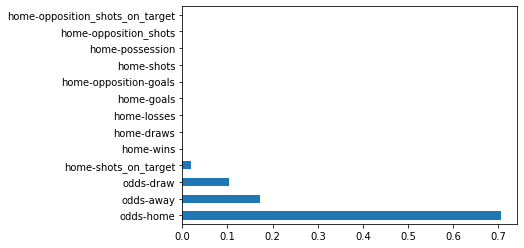

In [54]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

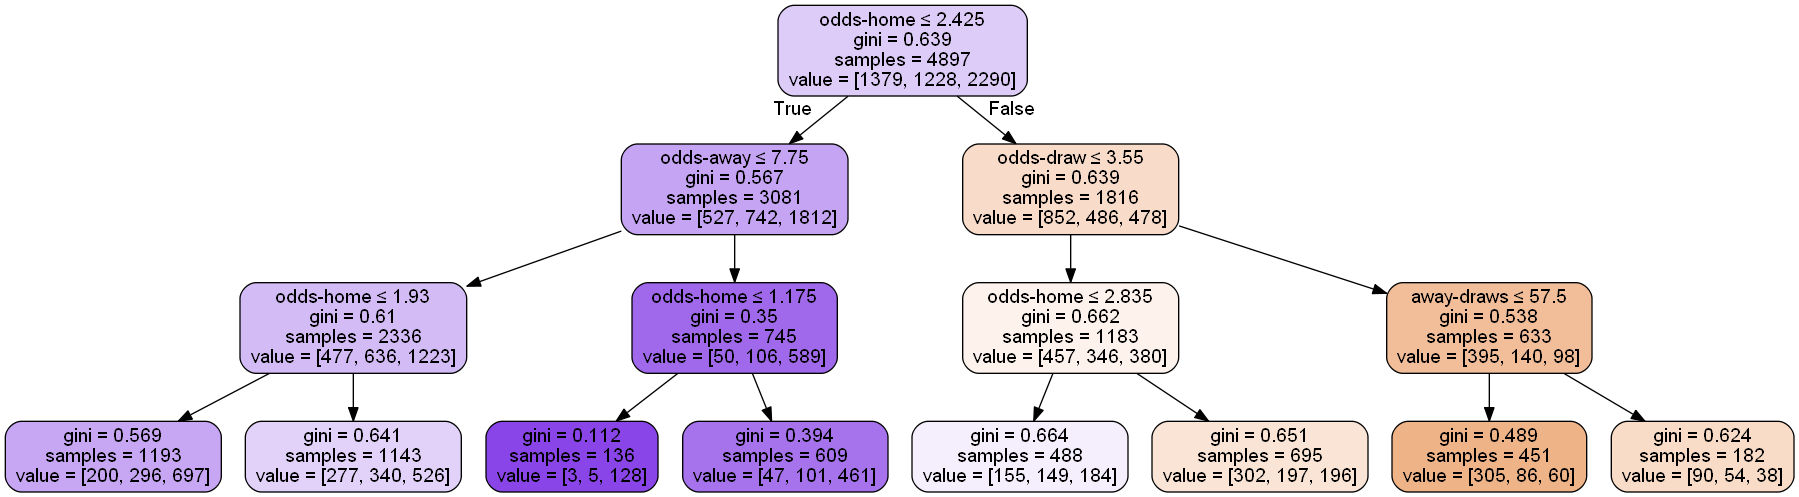

In [56]:

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data, 
                feature_names=feature_cols,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#graph.write_pdf("./tree.pdf")

Image(graph.create_png())